# Titanic Dataset Analysis

## Pandas

In this notebook, we'll learn the basics of data analysis with the Python Pandas library.

## Uploading the data

We're first going to get some data to play with<br>
We're going to load the titanic dataset from the public link below.

In [1]:
import urllib
# import urllib.request

In [2]:
# Upload data from GitHub to notebook's local drive (correct URL for raw file content)
# url = "https://raw.githubusercontent.com/datasciencedojo/datasets/refs/heads/master/titanic.csv"
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
file_name = 'titanic-dataset.csv'
file_name_processed = 'processed-titanic-dataset.csv'

# Download the file
response = urllib.request.urlopen(url)
csv_data = response.read()

# Save to local file
with open(file_name, 'wb') as f:
    f.write(csv_data)

# Loading the data

Now that we have some data to play with, let's load it into a Pandas dataframe.<br>Pandas is a great Python library for data analysis.

In [3]:
import pandas as pd

In [4]:
# Read from CSV to Pandas DataFrame
df = pd.read_csv(file_name, header=0)

In [5]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [6]:
# First five items
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


These are the diferent features: 
* pclass: class of travel
* name: full name of the passenger
* sex: gender
* age: numerical age
* sibsp: # of siblings/spouse aboard
* parch: number of parents/child aboard
* ticket: ticket number
* fare: cost of the ticket
* cabin: location of room
* emarked: port that the passenger embarked at (C - Cherbourg, S - Southampton, Q = Queenstown)
* survived: survial metric (0 - died, 1 - survived)

## Exploratory analysis

We're going to use the Pandas library and see how we can explore and process our data.

In [7]:
# Describe features
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: >

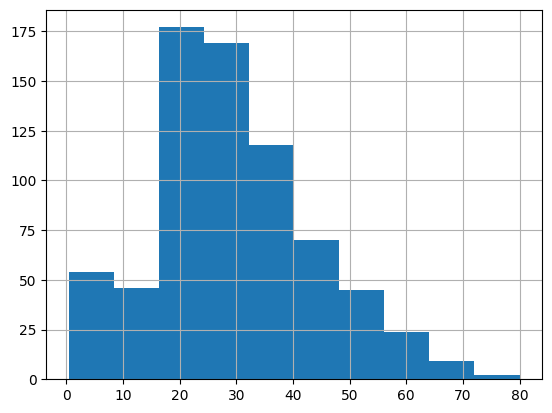

In [8]:
# Histograms
df["Age"].hist()

In [9]:
# Unique values
df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [10]:
# Selecting data by feature
df["Name"].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [11]:
# Filtering
df[df["Sex"]=="female"].head() # only the female data appear

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [12]:
# Sorting
df.sort_values("Age", ascending=False).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q


In [13]:
# Grouping
# survived_group = df.groupby("Survived")
# survived_group.mean()

# Grouping - use the correct capitalization for column names
survived_group = df.groupby("Survived")  # Make sure to use uppercase "S" to match the dataset
survived_group.mean(numeric_only=True)   # Add numeric_only=True to calculate mean only for numerical columns

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


In [14]:
# Selecting row
df.iloc[0, :] # iloc gets rows (or columns) at particular positions in the index (so it only takes integers)

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                               22.0
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Name: 0, dtype: object

In [15]:
# Selecting specific value
df.iloc[0, 1]


np.int64(0)

In [16]:
# Selecting by index
df.loc[0] # loc gets rows (or columns) with particular labels from the index

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                               22.0
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Name: 0, dtype: object

## Preprocessing

In [17]:
# Rows with at least one NaN value
df[pd.isnull(df).any(axis=1)].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [18]:
# Drop rows with Nan values
df = df.dropna() # removes rows with any NaN values
df = df.reset_index() # reset's row indexes in case any rows were dropped
df.head()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
1,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
2,6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
3,10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
4,11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [19]:
# Rows with at least one NaN value
df[pd.isnull(df).any(axis=1)].head()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [20]:
# Dropping multiple columns
df = df.drop(["Name", "Cabin", "Ticket"], axis=1) # we won't use text features for our initial basic models
df.head()

,index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,2,1,1,female,38.0,1,0,71.2833,C
1,3,4,1,1,female,35.0,1,0,53.1000,S
2,6,7,0,1,male,54.0,0,0,51.8625,S
3,10,11,1,3,female,4.0,1,1,16.7000,S
4,11,12,1,1,female,58.0,0,0,26.5500,S


In [21]:
# Map feature values
df['Sex'] = df['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
df["Embarked"] = df['Embarked'].dropna().map( {'S':0, 'C':1, 'Q':2} ).astype(int)
df.head()

,index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,2,1,1,0,38.0,1,0,71.2833,1
1,3,4,1,1,0,35.0,1,0,53.1000,0
2,6,7,0,1,1,54.0,0,0,51.8625,0
3,10,11,1,3,0,4.0,1,1,16.7000,0
4,11,12,1,1,0,58.0,0,0,26.5500,0


## Feature engineering

In [22]:
# Lambda expressions to create new features
def get_family_size(sibsp, parch):
    family_size = sibsp + parch
    return family_size

df["family_size"] = df[["SibSp", "Parch"]].apply(lambda x: get_family_size(x["SibSp"], x["Parch"]), axis=1)
df.head()

,index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,family_size
0,1,2,1,1,0,38.0,1,0,71.2833,1,1
1,3,4,1,1,0,35.0,1,0,53.1000,0,1
2,6,7,0,1,1,54.0,0,0,51.8625,0,0
3,10,11,1,3,0,4.0,1,1,16.7000,0,2
4,11,12,1,1,0,58.0,0,0,26.5500,0,0


In [24]:
# Reorganize headers
df = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'family_size', 'Fare', 'Embarked', 'Survived']]
df.head()

,Pclass,Sex,Age,SibSp,Parch,family_size,Fare,Embarked,Survived
0,1,0,38.0,1,0,1,71.2833,1,1
1,1,0,35.0,1,0,1,53.1000,0,1
2,1,1,54.0,0,0,0,51.8625,0,0
3,3,0,4.0,1,1,2,16.7000,0,1
4,1,0,58.0,0,0,0,26.5500,0,1


## Saving data

In [25]:
# Saving dataframe to CSV
df.to_csv(file_name_processed, index=False)

In [26]:
# See your saved file
# !ls -l
!dir

 Volume in drive C is SYSTEM
 Volume Serial Number is 70A4-0FB1

 Directory of C:\Users\pavel\projects\ai-python\21-ml-ds

12.04.2025  10:01    <DIR>          .
11.04.2025  11:21    <DIR>          ..
12.04.2025  09:53    <DIR>          .ipynb_checkpoints
11.04.2025  11:27             1˙846 brain.py
20.11.2024  12:40         9˙140˙113 data.csv
11.04.2025  10:55           136˙157 iris-dataset.ipynb
11.04.2025  10:43             2˙609 ml_model.joblib
12.04.2025  10:01             4˙914 processed-titanic-dataset.csv
11.04.2025  10:54           111˙276 soccer.ipynb
12.04.2025  10:01            78˙376 titanic-1.ipynb
12.04.2025  09:56            60˙302 titanic-dataset.csv
               8 File(s)      9˙535˙593 bytes
               3 Dir(s)  301˙911˙035˙904 bytes free
